# **Flower images classification using Tensorflow and pretrained RESNET 50 model**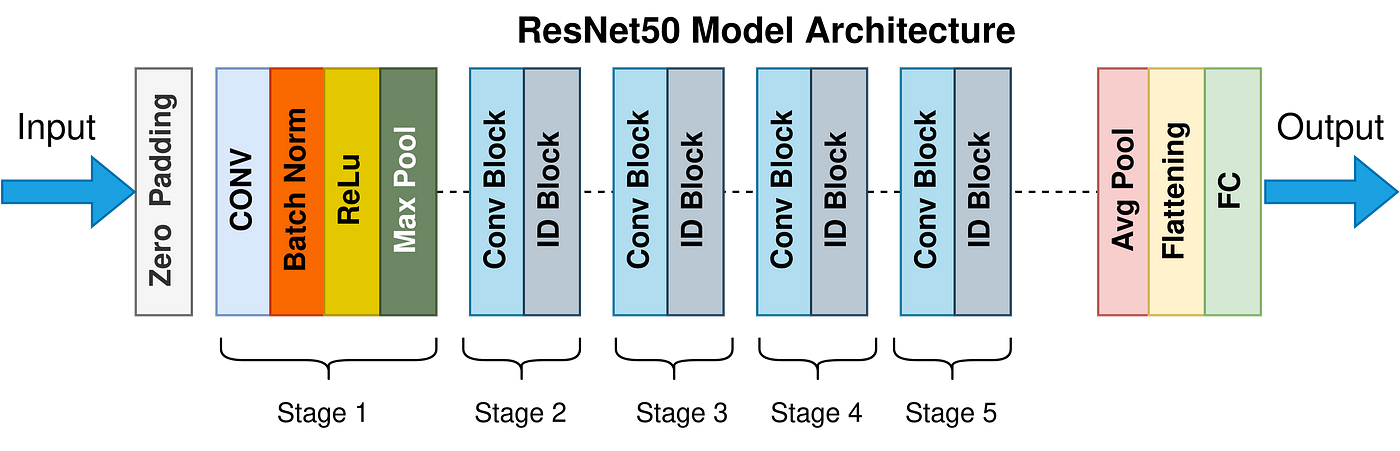

ResNet-50 is a deep neural network architecture that belongs to the family of Residual Networks (ResNets). It was introduced by Kaiming He, et al., in their paper titled "Deep Residual Learning for Image Recognition," published in 2016.

Here are some key features and characteristics of the ResNet-50 model:

**Residual Networks (ResNets)**:

ResNets are designed to address the challenges of training very deep neural networks.
The key innovation in ResNets is the use of residual blocks, which include shortcut connections that skip one or more layers. These shortcut connections allow the model to learn residuals (differences) rather than the entire transformation, making it easier to train deep networks.

**Architecture:**
ResNet-50 is a specific variant of the ResNet architecture that includes 50 convolutional layers. The architecture consists of repeating blocks of convolutional layers, batch normalization, and shortcut connections.
The network ends with a global average pooling layer and a fully connected layer for classification.
Skip Connections:

The skip connections in ResNet-50 provide shortcuts for the gradient flow during training, addressing the vanishing gradient problem associated with very deep networks.
The shortcut connections allow information to bypass one or more layers, facilitating the flow of gradients and making it easier to train deep models.

**Pre-trained Weights:**
ResNet-50 is often used as a pre-trained model on large image datasets, such as ImageNet.
The pre-trained weights are valuable for transfer learning, where the model can be fine-tuned on a specific task with a smaller dataset.
Applications:

ResNet-50, like other ResNet variants, has achieved state-of-the-art performance on various image classification tasks.
It is widely used in computer vision applications, including image recognition, object detection, and image segmentation.

**Computational Efficiency:**
Despite its depth, ResNet-50 is computationally efficient due to the use of global average pooling and the absence of fully connected layers in the intermediate stages.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *  # Single import for layers is sufficient
from tensorflow.keras.optimizers import *  # Import for optimizers


In [23]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [24]:
print(data_dir)

/root/.keras/datasets/flower_photos


[PosixPath('/root/.keras/datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/13979889721_42a59ca9fa_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/8562144481_1d629848ff.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/4684127262_6c3346188d.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/4093390305_4010c736c9.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/2535466143_5823e48b63.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/19919867648_043cf02fc3.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/roses/4231745228_ece86330d9.jpg')]


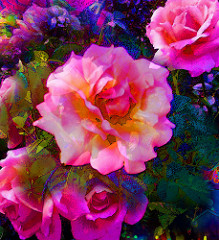

In [25]:
roses = list(data_dir.glob('roses/*'))
print(roses[0:10])
PIL.Image.open(str(roses[10]))

In [26]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


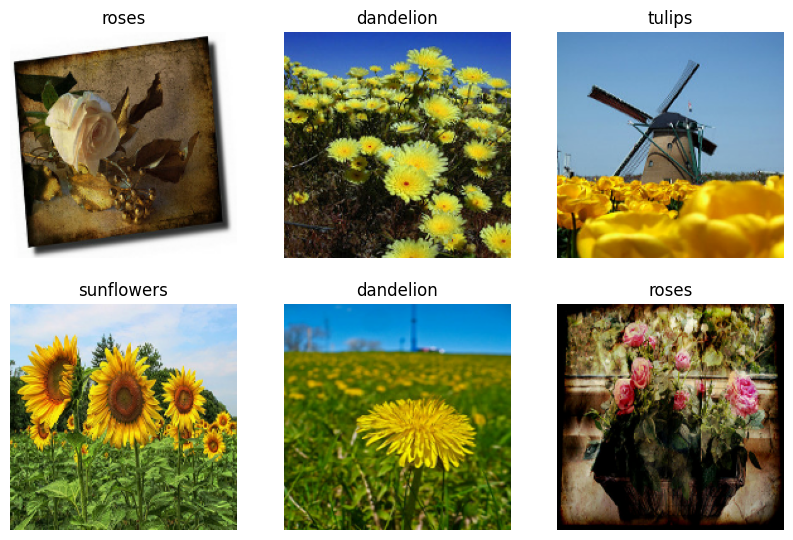

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50

In [31]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))


In [32]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [35]:
#resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 21s 137ms/step - loss: 0.8043 - accuracy: 0.7582 - val_loss: 0.4279 - val_accuracy: 0.8392
Epoch 2/10
92/92 [==============================] - 9s 99ms/step - loss: 0.2649 - accuracy: 0.9029 - val_loss: 0.3835 - val_accuracy: 0.8597
Epoch 3/10
92/92 [==============================] - 9s 90ms/step - loss: 0.1956 - accuracy: 0.9254 - val_loss: 0.3887 - val_accuracy: 0.8597
Epoch 4/10
92/92 [==============================] - 9s 96ms/step - loss: 0.1137 - accuracy: 0.9612 - val_loss: 0.3680 - val_accuracy: 0.8692
Epoch 5/10
92/92 [==============================] - 9s 96ms/step - loss: 0.0595 - accuracy: 0.9850 - val_loss: 0.3989 - val_accuracy: 0.8692
Epoch 6/10
92/92 [==============================] - 9s 93ms/step - loss: 0.0408 - accuracy: 0.9918 - val_loss: 0.3927 - val_accuracy: 0.8719
Epoch 7/10
92/92 [==============================] - 9s 91ms/step - loss: 0.0220 - accuracy: 0.9980 - val_loss: 0.3826 - val_accuracy: 0.8801
Epoch 8/10


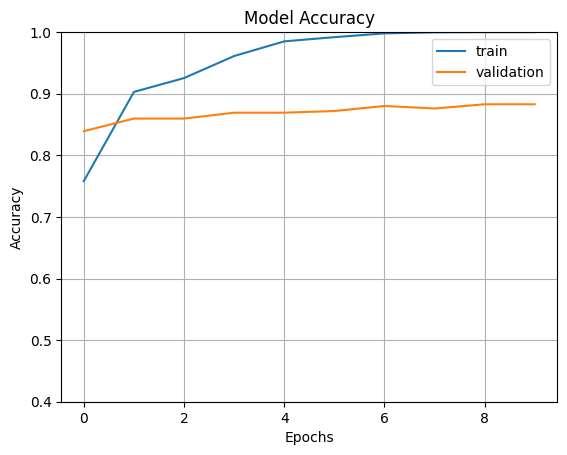

In [37]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

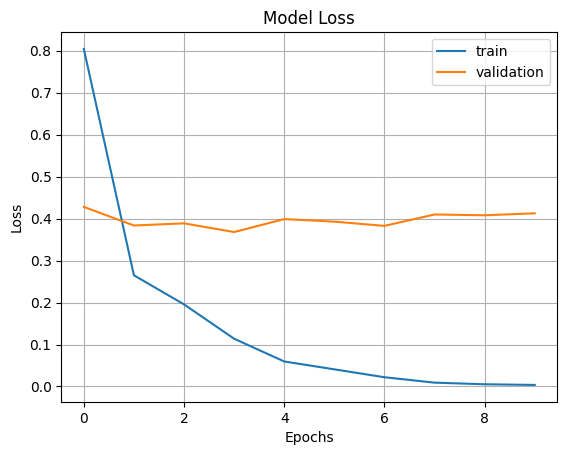

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [43]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
import cv2
image=cv2.imread('/content/images.jfif')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


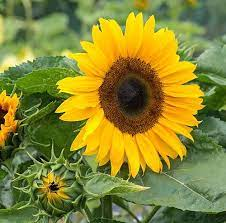

In [46]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 57ms/step
[[1.6968976e-01 3.0158708e-04 2.7648002e-04 8.2961977e-01 1.1235934e-04]]


In [47]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is sunflowers
